In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df_train = pd.read_csv("/content/sample_data/adult.csv",na_values = {'workclass':'?',
                                    'occupation':'?',
                                    'native-country':'?'})
df_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df_train.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
# Check number of missing values
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

native-country     857
workclass         2799
occupation        2809
dtype: int64

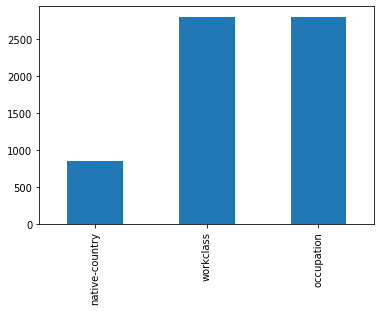

In [7]:
missing.plot.bar()

In [8]:
df_train.duplicated().any()

True

In [9]:
df_train=df_train.drop_duplicates()

In [10]:
income_dict={
    '<=50K': 0,
    '>50K': 1,
}
df_train['income']= df_train.income.map(income_dict)
df_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [11]:
df_train['gender'] = df_train['gender'].map({'Male': 0, 'Female':1})
df_train['race'] = df_train['race'].map({'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3,'Other': 4})
df_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,1,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,0,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,0,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,1,0,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,0,1,0,0,30,United-States,0


In [12]:
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == object]
qualitative

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'native-country']

In [13]:
df_train=df_train.drop(['workclass','native-country', 'occupation'],axis=1)

In [14]:
df_train

,age,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,226802,11th,7,Never-married,Own-child,1,0,0,0,40,0
1,38,89814,HS-grad,9,Married-civ-spouse,Husband,0,0,0,0,50,0
2,28,336951,Assoc-acdm,12,Married-civ-spouse,Husband,0,0,0,0,40,1
3,44,160323,Some-college,10,Married-civ-spouse,Husband,1,0,7688,0,40,1
4,18,103497,Some-college,10,Never-married,Own-child,0,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,Assoc-acdm,12,Married-civ-spouse,Wife,0,1,0,0,38,0
48838,40,154374,HS-grad,9,Married-civ-spouse,Husband,0,0,0,0,40,1
48839,58,151910,HS-grad,9,Widowed,Unmarried,0,1,0,0,40,0
48840,22,201490,HS-grad,9,Never-married,Own-child,0,0,0,0,20,0


In [15]:
single = ['Never-married', 'Widowed', 'Divorced', 'Separated']
inRelation = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
df_train['marital-status'] = df_train['marital-status'].transform(lambda x: 0 if x in single else 1 )

In [16]:
school_grade=['11th', 'HS-grad', 'Assoc-acdm', '10th', 'Prof-school', '7th-8th',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']
college_grade = ['Some-college', 'Bachelors']
high_studies = ['Masters', 'Doctorate']

df_train["education"] = df_train["education"].transform(lambda x : 0 if x in school_grade\
                                          else (1 if x in college_grade else 2))

In [17]:
df_train

,age,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,226802,0,7,0,Own-child,1,0,0,0,40,0
1,38,89814,0,9,1,Husband,0,0,0,0,50,0
2,28,336951,0,12,1,Husband,0,0,0,0,40,1
3,44,160323,1,10,1,Husband,1,0,7688,0,40,1
4,18,103497,1,10,0,Own-child,0,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,0,12,1,Wife,0,1,0,0,38,0
48838,40,154374,0,9,1,Husband,0,0,0,0,40,1
48839,58,151910,0,9,0,Unmarried,0,1,0,0,40,0
48840,22,201490,0,9,0,Own-child,0,0,0,0,20,0


In [18]:
features = ['age', 'educational-num', 'marital-status','race', 'gender', 'hours-per-week']
target = ['income']
x = df_train[features]
y = df_train[target]

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [20]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state = 0)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))


Train Accuracy: 0.8435276549644248
Test Accuracy: 0.821548131447701
